About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [1]:
#importing necessar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import seaborn as sns



In [2]:
#importing the dataset
df = pd.read_csv("../input/netflix-shows/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape   #to get the dimension of an array

(8807, 12)

In [4]:
df_movies = df.loc[df['type'] == 'Movie'].reset_index() # extracting the rows which consist of movies
df_movies['index'] = df_movies.index       
df_movies.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [5]:
df_movies.shape 

(6131, 13)

In [6]:
df_shows = df.loc[df['type'] == 'TV Show'].reset_index() # extracting the rows which consist of TV show
df_shows['index'] = df_shows.index       
df_shows.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,2,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
3,3,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [7]:
# now we will check if there is any duplicate items in both the dataframes

print(df_movies.duplicated().sum())
print(df_shows.duplicated().sum())   

0
0


As we can see there is no duplicate values in both the data frames

In [8]:
df.info() # shows us the count and data type of each colomun

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We noticed that date_added variable should be of  datetime data type but it is object so we will convert this variable to datetime

In [9]:
#convert date_added from object to datetime64

df['date_added'] = pd.to_datetime(df['date_added'])

Now we will again check the data type of each varibale to make sur our conversion is done.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


As we can see the date_added variable is of datetime data type

*Checking missing Values*

Now we will check if there are any missing values in our data frame so for that we will use python built in function to get the sum of all the missing values.

In [11]:

df.isna().sum()  #will give the sum of missing values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

As we can see we have so many missing values in director ,cast ,country,date_added and ratings.
so we will fill all these null values with a word "unavailable"except for release_year and duration that we will see later on.
So, here I made a dictionary to replace all the null values with a word "unavailable" by using a function called fillna().

In [12]:

df.fillna({'rating' : 'unavailable', 'cast' : 'unavailable', 'country' : 'unavailavle', 'director':'unavailable'},inplace=True)

df.isna().sum() 

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

Now we can see that there is no null value left in our data set except for the date_added and duration that we will see now.

So, we have 10 null values for date_added colomun, i have three options to deal with these 10 null values 
1-first we can delet all of them since they are only 10 so its not gonna affect our analysis
2-Second we can fill all those entries manually by finding out the date_added.
3-Third is we can fill the most recent date in all of them because netflix added content time to time.

Here i am moving futher with our first option and using dropna() funnction to drop all the rows with null date_added.

In [13]:
df.dropna(subset = ['date_added'],inplace = True)

In [14]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

As we can see now we have removed all the null values from date_added. now we will see null values from duration colomuns.

In [15]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Here we noticed two things intresting
1- first is all the null values in duration are having same director which is Louis C.K.
2- second is rating colomun seems to have mistakenly duration values this seems to have human error    so we will transfer these ratings values to the actual duration values.

So first we will check are there any other rows with director Louis C.K so that our conversion wont affect other rows containing same director Louis C.K

In [16]:
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


We can see  are there only those three rows which are having missing duration values so we can simply transfer all the rating colomun values to duration colomun from a rows which are having director Louis C.K. and check our conversion is done or not.

In [17]:
#loc function is used to access the colomun by name
df.loc[df['director'] == 'Louis C.K.','duration'] = df['rating']
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


As we can clearly see that we have all the values copied from rating colomun to duration colomun
Now we will make all these rating value to "unavailable".

In [18]:
df.loc[df['director']=='Louis C.K.','rating'] = 'Unavailable'
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


Now we can see in rating we have "unavailable" in duration we have our values.
Now we have fixed our data types of all variables and we have fixed all our varibaled now its time to do some exploratory analysis.

# Exploratory data analysis 

So first we will counts diffrent types of catagories of our data

In [19]:
df.type.value_counts() #counting diffrent catagories in a given colomun

Movie      6131
TV Show    2666
Name: type, dtype: int64

So there are two types of catagories of our data Movie and TV Show. Now we will visualize it on a bar plot to see more clearly which 

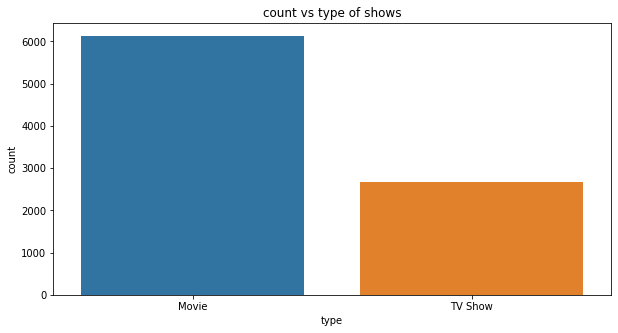

In [20]:
#countplot helps us to plot count of each catagory

plt.figure(figsize =(10,5))
plt.title('count vs type of shows')
sns.countplot(data = df, x ='type');


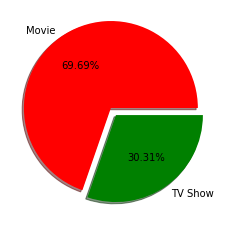

In [21]:
Type = ['Movie','TV Show']
exp = (0.1,0)
c = ['red','green']
sizes = df.type.value_counts()
plt.pie(sizes , labels = Type, explode = exp , autopct = '%.2f%%',colors = c,shadow =True)
plt.show()
    

Country Analysis

In [22]:
df['country'].value_counts().head(10)

United States     2812
India              972
unavailavle        830
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

Text(0.5, 1.0, 'country wise content on netflix')

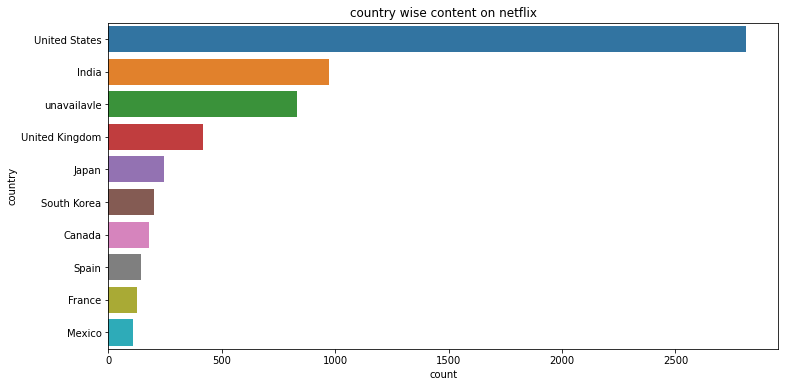

In [23]:
plt.figure(figsize = (12,6))
sns.countplot(y = 'country',order = df['country'].value_counts().index[0:10],data = df)
plt.title('country wise content on netflix')

In [24]:
#now checking type of content based on country
movie_country = df[df['type'] =='Movie']
tv_show_country = df[df['type'] == 'TV Show']

Text(0.5, 1.0, 'Top 10 countries producing tv shows on netflix')

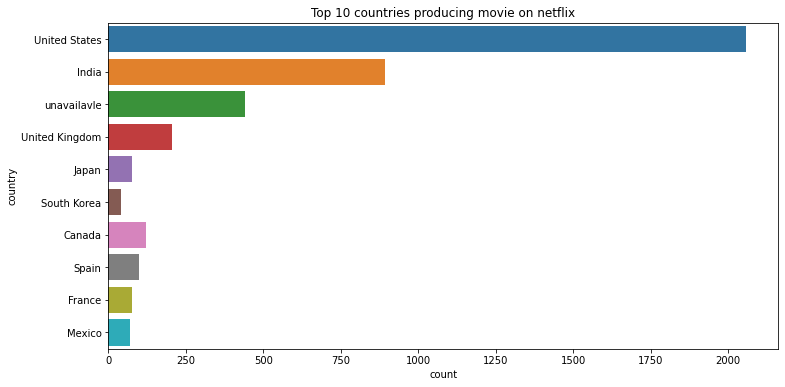

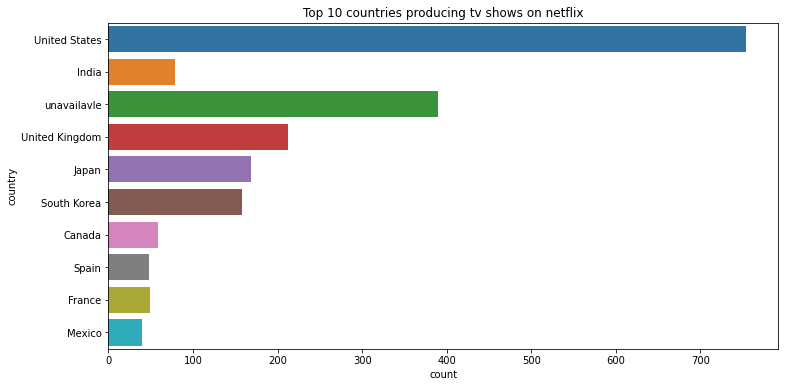

In [25]:
plt.figure(figsize = (12,6))
sns.countplot(y = 'country',order = df['country'].value_counts().index[0:10],data = movie_country )
plt.title('Top 10 countries producing movie on netflix')


plt.figure(figsize = (12,6))
sns.countplot(y = 'country',order = df['country'].value_counts().index[0:10],data =tv_show_country)
plt.title ('Top 10 countries producing tv shows on netflix')



In [26]:
#major ratings given to netflix shows
df['rating'].value_counts().head(10)

TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: rating, dtype: int64

Text(0.5, 1.0, 'rating of shows on netflix vs counts')

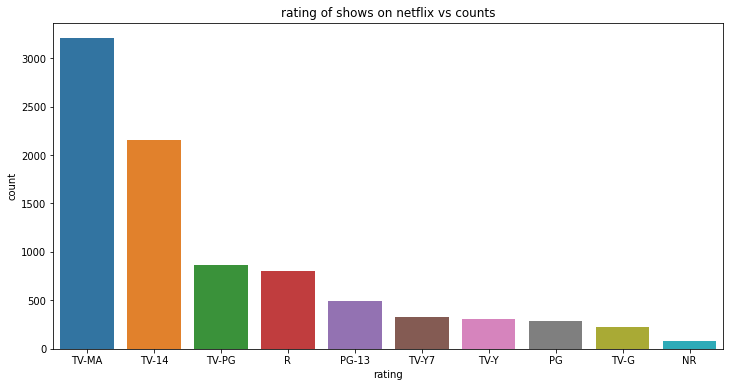

In [27]:
#visualizing ratings
plt.figure(figsize = (12,6))
sns.countplot(x = 'rating' , order = df['rating'].value_counts().index[0:10],data = df)
plt.title('rating of shows on netflix vs counts')
              

In [28]:
#in which year netflix has produced more content

df['release_year'].value_counts().head(20)

2018    1146
2017    1032
2019    1030
2020     953
2016     901
2021     592
2015     558
2014     352
2013     287
2012     236
2010     193
2011     185
2009     152
2008     135
2006      96
2007      88
2005      80
2004      64
2003      59
2002      51
Name: release_year, dtype: int64

Text(0.5, 1.0, 'content release in years on netflix')

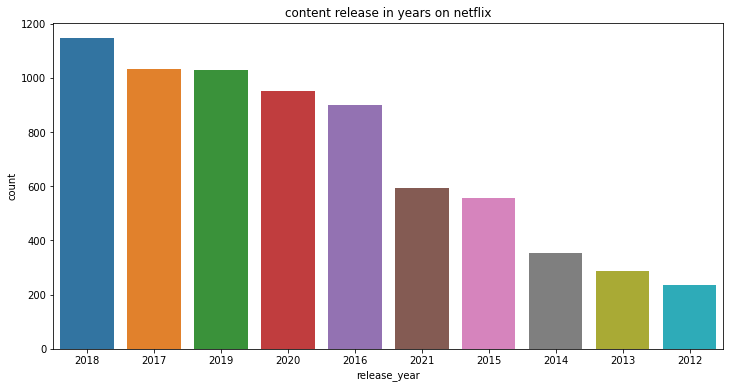

In [29]:
plt.figure(figsize = (12,6))
sns.countplot(x='release_year',order = df['release_year'].value_counts().index[0:10],data = df)
plt.title('content release in years on netflix')

Text(0.5, 1.0, 'Top 20 Genres on netflix')

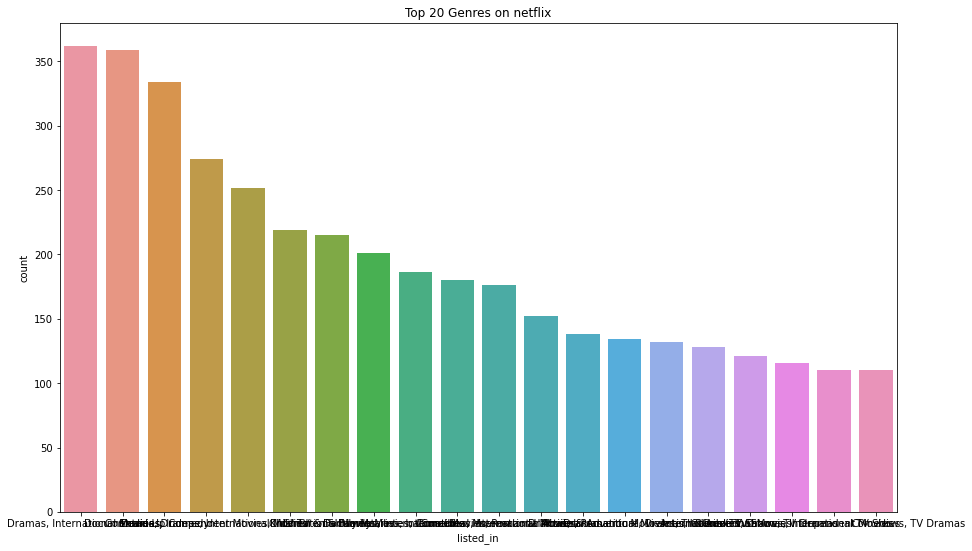

In [30]:
#popular genres Analysis

plt.figure(figsize = (15,9))
sns.countplot(x='listed_in',order = df['listed_in'].value_counts().index[0:20],data = df)
plt.title('Top 20 Genres on netflix')

